In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [3]:
df2 = pd.read_csv('Update_Hotel_booking.csv')
df2.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                33
adults                              14
children                             5
babies                               5
meal                                 4
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                   9
assigned_room_type                  11
booking_changes                     19
deposit_type                         3
agent                              334
company                            349
days_in_waiting_list     

### I will see how many rows and columns do I have in this dataset

In [4]:
df.shape

(119390, 32)

### I will display all the columns name

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### I want to know how many data different contains each column

In [6]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

# Understanding the dataset. Elements we have by columns 

### How many entries do we have by Hotels

In [7]:
df['hotel'].value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

#### We have an unbalanced data

### Now I want to know how many differents types of meal I have in this dataset

In [8]:
df['meal'].value_counts()

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

#### I have 1169 undefined data

### Now I want to know the market segment

In [9]:
df['market_segment'].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

### I will see now the distribution channel

In [10]:
df['distribution_channel'].value_counts()

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

### The deposite type

In [11]:
df['deposit_type'].value_counts()

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64

### The customer type

In [12]:
df['customer_type'].value_counts()

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

### Special Requests

In [13]:
df['total_of_special_requests'].value_counts()

total_of_special_requests
0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: count, dtype: int64

# Let's show same data by ploting

<Axes: xlabel='hotel', ylabel='count'>

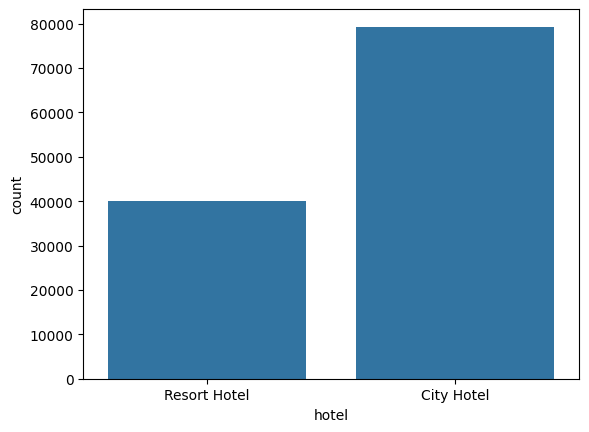

In [14]:
sns.countplot(data=df, x='hotel')

<Axes: xlabel='is_canceled', ylabel='count'>

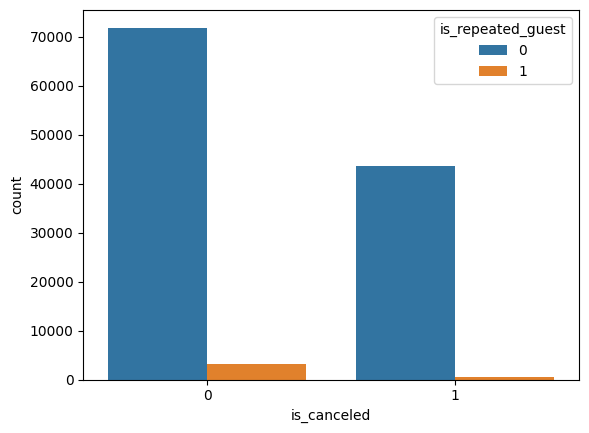

In [15]:
sns.countplot(data=df, x='is_canceled', hue='is_repeated_guest')

<Axes: xlabel='hotel', ylabel='count'>

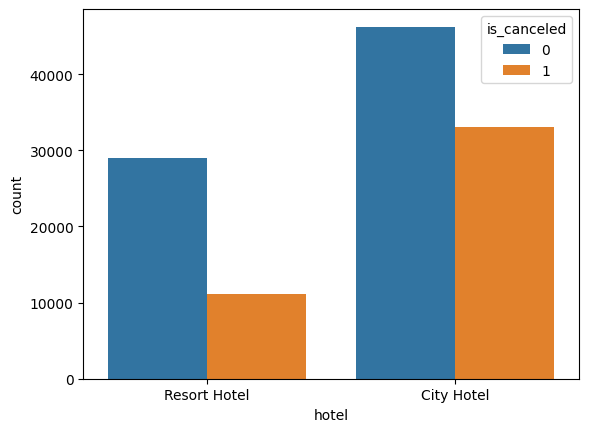

In [16]:
sns.countplot(data=df, x= 'hotel', hue='is_canceled')

# Data Preparation 

### Missing data

In [17]:
df.isnull().values.any()

True

### If we have null values we should work on those null values

In [18]:
df.isnull().sum() #with this code we can see where are those null values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Replacing null values with 0

In [19]:
df.fillna(0, inplace=True)

### Meal contains values "Undefined", which is equal to SC

In [20]:
df['meal'].replace("Undefined", "SC", inplace=True)

In [21]:
df['meal'].unique() #Checking the change

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

### Deleting the data of the columns 'children', 'adults', 'babies'

In [22]:
Subset=df[(df['children']==0) & (df['adults']==0) & (df['babies']==0)] #I create a subset to analize

In [23]:
Subset[['adults','babies','children']]

,adults,babies,children
2224,0,0,0.0
2409,0,0,0.0
3181,0,0,0.0
3684,0,0,0.0
3708,0,0,0.0
...,...,...,...
115029,0,0,0.0
115091,0,0,0.0
116251,0,0,0.0
116534,0,0,0.0


In [24]:
type(Subset) # = pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

In [25]:
Delete=(df['children']==0) & (df['adults']==0) & (df['babies']==0)

In [26]:
type(Delete)

pandas.core.series.Series

In [27]:
Delete

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [28]:
data=df[~Delete]

In [29]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [30]:
Subset=data[(data['children']==0) & (data['adults']==0) & (data['babies']==0)]

In [31]:
Subset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [32]:
data.shape #We confirm the data previously, 180 records(119390-119210)

(119210, 32)

In [33]:
119390-119210

180

### We create another csv

In [34]:
data.to_csv('Update_Hotel_booking.csv', index=False)

# Where do the guests come from

In [35]:
guest_country = data[data['is_canceled']==0  ]['country'].value_counts().reset_index()
guest_country.columns = ['country', 'Number of guests']

In [36]:
guest_country

,country,Number of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


### Now I will see how many guests from a country do I have

In [37]:
total_guests = guest_country['Number of guests'].sum()
total_guests

75011

### Now I will have display the percentage for each country

In [42]:
guest_country['Guest in %'] = round( guest_country['Number of guests'] / total_guests * 100, 2)
guest_country

,country,Number of guests,Guest in %
0,PRT,20977,27.97
1,GBR,9668,12.89
2,FRA,8468,11.29
3,ESP,6383,8.51
4,DEU,6067,8.09
...,...,...,...
161,BHR,1,0.00
162,DJI,1,0.00
163,MLI,1,0.00
164,NPL,1,0.00


### I will plot in bar this data extracted

In [41]:
trace = go.Bar(
    x = guest_country['country'],
    y = guest_country['Number of guests'],
    marker=dict(color='#CD7F32')
)
data1 = [trace]
layout = go.Layout(
    title = 'Guests by country'
)
fig = go.Figure(data = data1, layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [44]:
map_guest = px.choropleth(guest_country,
                    locations=guest_country['country'],
                    color=guest_country['Number of guests'], 
                    hover_name=guest_country['country'], 
                    title="Home country of guests")
map_guest.show()